In [72]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import MinMaxScaler ,StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import lime
import lime.lime_tabular
import sklearn.ensemble
import numpy as np

In [52]:
df = pd.read_csv('bike_train.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [41]:
df.groupby('datetime')['casual', 'registered'].mean()

,casual,registered
datetime,,
2011-01-01 00:00:00,3,13
2011-01-01 01:00:00,8,32
2011-01-01 02:00:00,5,27
2011-01-01 03:00:00,3,10
2011-01-01 04:00:00,0,1
...,...,...
2012-12-19 19:00:00,7,329
2012-12-19 20:00:00,10,231
2012-12-19 21:00:00,4,164


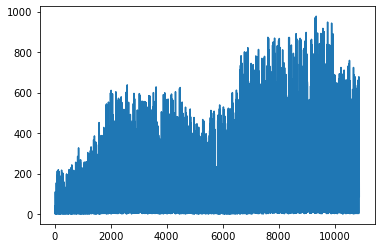

In [3]:
#We can see a growth over time for the use of bike
df['count'].plot()

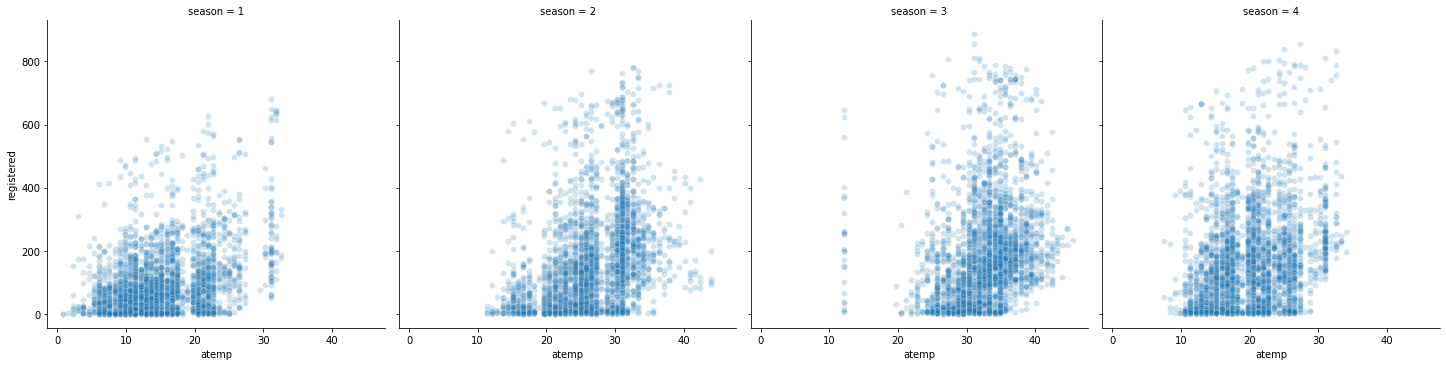

In [4]:
    sns.relplot(data=df, x='atemp',y='registered',alpha=0.2,col='season')

In [5]:
X_train = df.iloc[:,:-3]
y_train = df[['count']]


In [6]:
X_train['hours'] = range(max(df.index+1))
X_train.drop('datetime',axis=1,inplace=True)

In [7]:
#Fe date

#X_train['datetime'] = df['datetime'].apply(pd.to_datetime)
#X_train['datetime'] = X_train['datetime'].values.astype(float)



In [8]:
#Let's try a Random Forest
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
cross_val_score(rf,X_train,y_train)


array([0.00505051, 0.00459348, 0.00045935, 0.00367478, 0.00275609])

In [9]:
print(cross_val_score(lr,X_train,y_train,scoring='r2'))
print(cross_val_score(lr,X_train,y_train,scoring='explained_variance'))

NameError: name 'lr' is not defined

In [ ]:
#Let's try a Linear Reg
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_train)
lr.coef_ # It's not possible to give it a name directly?

In [ ]:
list(zip(X_train.columns,lr.coef_[0]))

In [ ]:
X_train.columns

In [ ]:
lr.score(X_train,y_train)

In [ ]:
cross_val_score(lr,X_train,y_train)

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False, 
                                   # if we set this to true it will add a column of 1 for the intercept; This is not necessary because sklearn does that automatically when fitting a model
                                  interaction_only=False )
poly_m = LinearRegression()

In [ ]:
X_poly = poly.fit_transform(X_train)

In [ ]:
poly_m.fit(X_poly, y_train)

In [ ]:
poly_ypred = poly_m.predict(X_poly)

In [ ]:
poly_m.score(X_poly,y_train)

In [ ]:
cross_val_score(poly_m,X_poly,y_train).mean()
#print(cross_val_score(poly_m,X_train,y_train,scoring='explained_variance'))
# The score is different but the Cross score is the same ?!

In [ ]:
print(cross_val_score(poly_m,X_train,y_train,scoring='r2'))

In [ ]:
#Let's do some FE

# Keep the 24 hours
# Drop strongly Corr col
# Bin or Scale  

In [ ]:
X_train2 = df.iloc[:,:-3]

In [ ]:
#Keep only hours in the time col

X_train2['datetime'] = X_train2['datetime'].apply(pd.to_datetime)
X_train2['hour'] = X_train2['datetime'].dt.hour
X_train2.drop('datetime',axis=1, inplace=True)

In [ ]:
# Drop col with strong corr
sns.heatmap(X_train2.corr())

X_train2.drop('temp',axis=1, inplace=True)

In [ ]:
# One hot encode : Season, weather
# Bin + One hot : hour

# Scale : atemp, humidity, windspeed

In [ ]:
df['datetime'] = df['datetime'].apply(pd.to_datetime)
df['hour'] = df['datetime'].dt.hour

In [ ]:
gp = df[['hour','count']].groupby('hour').sum()

gp.plot.bar()

In [ ]:
# Bin + One hot : hour

h_bin = pd.DataFrame(pd.cut(X_train2['hour'],12,ordered=True))
one_hot_hour = pd.get_dummies(h_bin)

X_train2 = X_train2.join(one_hot_hour)

In [ ]:
# One hot encode : Season, weather
one_hot_season = pd.get_dummies(X_train2['weather'],drop_first=True,prefix='season')
one_hot_weather = pd.get_dummies(X_train2['season'],drop_first=True,prefix='weather')

X_train2 = X_train2.join(one_hot_season)
X_train2 = X_train2.join(one_hot_weather)

In [ ]:
# Drop hour,season and weather

X_train2.drop(['hour','season','weather'],axis=1,inplace=True)

In [ ]:
# Scale : atemp, humidity, windspeed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2['humidity'] = scaler.fit_transform(X_train2[['humidity']])
X_train2['atemp'] = scaler.fit_transform(X_train2[['humidity']])
X_train2['windspeed'] = scaler.fit_transform(X_train2[['humidity']])

X_train2

In [ ]:
#Let's try to run another poly

poly2 = PolynomialFeatures(degree=, include_bias=False, 
                                   # if we set this to true it will add a column of 1 for the intercept; This is not necessary because sklearn does that automatically when fitting a model
                                  interaction_only=False )
poly_m2 = LinearRegression()

X2_poly = poly2.fit_transform(X_train2)



In [36]:
poly_m2.fit(X2_poly,y_train)

poly_m2.score(X2_poly,y_train)

0.7125518394221964

In [67]:
select = df['datetime'] == '2012-01-04 00:00:00'
df.iloc[[5493]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5493,2012-01-04 00:00:00,1,0,1,1,3.28,3.03,42,22.0028,0,9,9


In [37]:
cross_val_score(poly_m,X2_poly,y_train,cv=3).mean()


-1204730962598048.2

In [37]:
#cross_val_score(poly_m,X2_poly,y_train,cv=2,scoring='r2')

In [162]:
# Re-run RandomForest on X_train2

rf = RandomForestClassifier()
rf.fit(X_train2, y_train)
rf.score(X_train2,y_train)
cross_val_score(rf,X_train2,y_train)

array([0.00918274, 0.010565  , 0.01286174, 0.01148369, 0.02113   ])

In [81]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'n_estimators': [23,25,28],
              'max_depth': [7,8,9],
              'min_samples_split': [4,5,6]}

In [103]:
rf_opti = RandomForestClassifier()

In [104]:
gridsearch = GridSearchCV(rf_opti, param_grid, verbose=True)

In [105]:
gridsearch.fit(X_train2, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.3min finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_split': [4, 5, 6],
                         'n_estimators': [23, 25, 28]},
             verbose=True)

In [106]:
gridsearch.score(X_train2, y_train)

0.16948374058423663

In [107]:
gridsearch.best_params_

{'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 25}

In [118]:
rf_best = gridsearch.best_estimator_

In [94]:
rf_best.predict

<bound method ForestClassifier.predict of RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=20)>

In [123]:
#Let's run a rf again with another Cross score method

from sklearn.model_selection import ShuffleSplit

rf2 = RandomForestClassifier(n_estimators=25,
              max_depth= 8,
              min_samples_split= 4)
rf2.fit(X_train2, y_train)
rf2.score(X_train2,y_train)




0.17471982362667646

In [125]:
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X_train2)

5

In [137]:
ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)

In [138]:
for train_index, test_index in rs.split(X_train2):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [10639  2666  7474 ...  9845 10799  2732] TEST: [6638 7975 5915 ... 5702 4813 5125]
TRAIN: [3354 5111 4741 ... 1139 2328 2219] TEST: [6395 6832 9781 ... 2562  904  390]
TRAIN: [ 9838  8259  4031 ...  4151   665 10420] TEST: [2075 2707 6480 ... 8052 4628 4175]
TRAIN: [2857 7293 8835 ... 9615  495 1377] TEST: [4024 5941   16 ... 5320 6264  941]
TRAIN: [6795 5956 2952 ... 9362 6073 8646] TEST: [5481 8121 7550 ... 5927 6447  594]


In [140]:
get_n_splits(X_train2,y_train,groups=2)

#I can't get it working

NameError: name 'get_n_splits' is not defined